<a href="https://colab.research.google.com/github/hiraeth12/midterm-deep-learning/blob/main/midterm_DL_3_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning - Clustering
## Sahrul Ridho Firdaus - 1103223009

In this assignment, you will build a customer clustering pipeline. You will use a customer dataset, clean and preprocess the data, handle missing values and outliers, and prepare useful features.
Then you will apply unsupervised learning methods (such as k-means, hierarchical clustering, or DBSCAN) to group customers based on their spending and payment behavior.
Your workflow should include data preprocessing, model training, choosing the number of clusters, evaluating the clusters, and explaining what each cluster represents.

In [ ]:
!pip install -U -q gdown

In [ ]:
folder_id = '1FsQtOI_QES15zZLmEw099MGAR5-rnsOP'
print(f"Downloading files from folder ID: {folder_id}")
!gdown --folder --id {folder_id}

print("Download complete. You can list the files in the current directory to see the downloaded content.")

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Retrieving folder contents
Processing file 1XtaKeD7b-la2R1ygFBNLj16VD1k0MB2Q clusteringmidterm.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1XtaKeD7b-la2R1ygFBNLj16VD1k0MB2Q
To: /content/Machine Learning/clusteringmidterm.csv
100% 1.01M/1.01M [00:00<00:00, 50.8MB/s]
Download completed
Download complete. You can list the files in the current directory to see the downloaded content.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import layers, models
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
print("Available GPUs:", tf.config.list_physical_devices('GPU'))

Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
!nvidia-smi

Sun Nov 30 18:14:05 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   60C    P0             30W /   70W |     102MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
df = pd.read_csv('/content/Machine Learning/clusteringmidterm.csv')
display(df.head())

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [ ]:
df.shape

(8950, 18)

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Check Data Types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## Check for Null Value

In [ ]:
df.isna().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


## Check Duplicated

In [ ]:
df.duplicated().sum()

np.int64(0)

## Data Pre-Processing

Drop kolom yang tidak dipakai

In [ ]:
df = df.drop(columns=["CUST_ID"])

Mengisi NULL *value* dengan median (nilai tengah)

In [ ]:
df = df.fillna(df.median())

Scale menggunakan standard scaler

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

## Training Model

In [ ]:
input_dim = X_scaled.shape[1]
latent_dim = 10  # bebas, tapi 8–16 biasanya ideal

input_layer = layers.Input(shape=(input_dim,))
e = layers.Dense(64, activation='relu')(input_layer)
e = layers.Dense(32, activation='relu')(e)
latent = layers.Dense(latent_dim, activation='relu')(e)

d = layers.Dense(32, activation='relu')(latent)
d = layers.Dense(64, activation='relu')(d)
output_layer = layers.Dense(input_dim)(d)

autoencoder = models.Model(inputs=input_layer, outputs=output_layer)
encoder = models.Model(inputs=input_layer, outputs=latent)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 17)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 17)             │         1,105 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,131 (27.86 KB)

 Trainable params: 7,131 (27.86 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoencoder.fit(
    X_scaled, X_scaled,
    epochs=50,
    batch_size=256,
    verbose=1
)


Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.9378
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6440
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3758
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2385
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1602
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1250
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0987
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0848
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0755
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0681
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0603
Epoch 12/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0558
Epoch 13/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0513
Epoch 14/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0470
Epoch 15/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0456
Epoch 16/50
35/35 

Print *Elbow Method* atau teknik visual untuk memilih jumlah cluster terbaik pada K-Means berdasarkan perubahan nilai inertia.

In [ ]:
latent_repr = encoder.predict(X_scaled)

280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


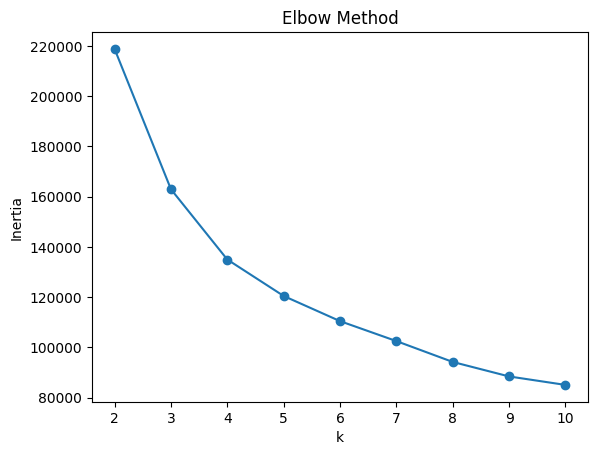

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(latent_repr)
    inertias.append(kmeans.inertia_)

plt.plot(K, inertias, marker='o')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [ ]:
k = 4
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(latent_repr)
cluster_centers = kmeans.cluster_centers_


In [ ]:
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    print(k, round(silhouette_score(X_scaled, labels), 4))

2 0.2795
3 0.2067
4 0.1665
5 0.1926
6 0.1923
7 0.2153
8 0.2036
9 0.2038


In [ ]:
def soft_assignment(z):
    q = 1.0 / (1.0 + tf.reduce_sum(tf.square(tf.expand_dims(z, axis=1) - cluster_centers), axis=2))
    q = q ** ((1 + 1) / 2)  # student t-distribution, alpha = 1
    q = q / tf.reduce_sum(q, axis=1, keepdims=True)
    return q


In [ ]:
def target_distribution(q):
    weight = q ** 2 / tf.reduce_sum(q, axis=0)
    p = weight / tf.reduce_sum(weight, axis=1, keepdims=True)
    return p


In [ ]:
optimizer = tf.keras.optimizers.Adam()
max_iter = 3000
update_interval = 100
batch_size = 256

# precompute z & q
z = encoder(X_scaled)
q = soft_assignment(z)
p = target_distribution(q)

for ite in range(max_iter):

    with tf.GradientTape() as tape:
        z = encoder(X_scaled)
        q = soft_assignment(z)
        loss = tf.reduce_mean(tf.keras.losses.KLDivergence()(p, q))

    grads = tape.gradient(loss, encoder.trainable_weights)

    # SKIP iterasi kalau semuanya None (prevent crash)
    if all(g is None for g in grads):
        print(f"[WARN] Iter {ite}: No gradients, skipping update.")
        continue

    optimizer.apply_gradients(zip(grads, encoder.trainable_weights))

    if ite % update_interval == 0:
        p = target_distribution(q)

    if ite % 300 == 0:
        print(f"Iter {ite} - KL Loss: {loss.numpy():.4f}")


Iter 0 - KL Loss: 0.0908
Iter 300 - KL Loss: 0.0655
Iter 600 - KL Loss: 0.0673
Iter 900 - KL Loss: 0.0682
Iter 1200 - KL Loss: 0.0683
Iter 1500 - KL Loss: 0.0671
Iter 1800 - KL Loss: 0.0639
Iter 2100 - KL Loss: 0.0596
Iter 2400 - KL Loss: 0.0568
Iter 2700 - KL Loss: 0.0543


In [ ]:
final_z = encoder.predict(X_scaled)
final_q = soft_assignment(final_z)
final_clusters = np.argmax(final_q, axis=1)

280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


## Evaluasi Hasil Clustering

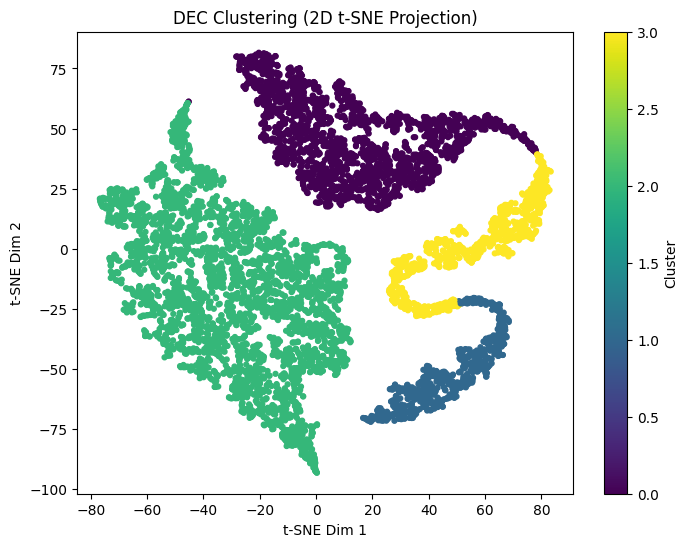

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Ambil latent space (final_z), cluster assignment (final_clusters)
# final_z = encoder.predict(X_scaled)
# final_q = soft_assignment(final_z)
# final_clusters = np.argmax(final_q, axis=1)

# --- 2D projection ---
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
z_2d = tsne.fit_transform(final_z)

# --- plot ---
plt.figure(figsize=(8,6))
scatter = plt.scatter(z_2d[:,0], z_2d[:,1], c=final_clusters, cmap='viridis', s=12)
plt.colorbar(scatter, label="Cluster")
plt.title("DEC Clustering (2D t-SNE Projection)")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.show()


In [ ]:
feature_names = df.columns
cluster_df = pd.DataFrame(X_scaled, columns=feature_names)
cluster_df['cluster'] = final_clusters

cluster_summary = cluster_df.groupby('cluster').mean()
cluster_summary

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,-0.214334,-0.249047,-0.077736,-0.087719,-0.022716,-0.124634,0.221579,-0.025083,0.203331,-0.079174,-0.103950,-0.067106,-0.015668,-0.139502,-0.106144,0.447412,-0.408294
1,1.409369,0.363206,1.482874,1.200208,1.301118,1.289385,0.541820,0.871735,0.574750,0.664446,0.842924,1.596694,1.359343,1.680119,0.816820,0.065250,0.032241
2,-0.265874,0.021567,-0.283271,-0.212809,-0.278666,-0.286247,-0.261963,-0.225048,-0.241599,-0.235164,-0.235858,-0.308523,-0.426566,-0.319037,-0.148517,-0.377364,0.290579
3,0.468034,0.196006,0.170491,0.127598,0.168307,0.440153,0.136606,0.290847,0.069803,0.616622,0.536662,0.160052,0.707186,0.302425,0.207495,0.462685,-0.275458
